# Análise de Padrões Táticos no Futebol Europeu
## Projeto Completo de Mineração de Dados

**Objetivo**: Analisar padrões táticos de times de futebol europeu utilizando técnicas de:
- Classificação (Decision Tree, Random Forest, KNN, Naive Bayes, SVM)
- Regras de Associação (Apriori)

**Dataset**: Atributos táticos e desempenho de times de futebol europeu

---

## 1. Importação de Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Clusterização
# Clusterização
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# Classificação
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Regras de Associação
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 4. Análise de Classificação

Vamos treinar modelos de classificação para prever o cluster de um time baseado em seus atributos táticos.

### 4.1. Preparação dos Dados

In [2]:
#Importar Dados

df = pd.read_csv('TABELA_FINAL_COM_CLUSTERS.csv')

# Atributos táticos
atributos_taticos = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing',
    'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
    'defenceAggression', 'defenceTeamWidth'
]

# Features e Target
X = df[atributos_taticos]
y = df['cluster']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nClasses: {sorted(y.unique())}")

# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nDados de treino: {X_train.shape[0]} registros")
print(f"Dados de teste: {X_test.shape[0]} registros")

Features (X): (1068, 8)
Target (y): (1068,)

Classes: [1, 2, 3, 4]

Dados de treino: 747 registros
Dados de teste: 321 registros


### 4.2. Treinamento dos Modelos

In [3]:
# Definir modelos
modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Treinar e avaliar
resultados = []

print("="*70)
print("TREINAMENTO E AVALIAÇÃO DOS MODELOS")
print("="*70)

for nome, modelo in modelos.items():
    print(f"\n--- {nome} ---")
    
    # Treinar
    modelo.fit(X_train, y_train)
    
    # Prever
    y_pred = modelo.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Cross-Validation (5-fold): {cv_mean:.4f} (+/- {cv_std:.4f})")
    
    resultados.append({
        'Modelo': nome,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })

print("\n✓ Treinamento concluído!")

TREINAMENTO E AVALIAÇÃO DOS MODELOS

--- Decision Tree ---
Acurácia: 0.8193
Precisão: 0.8232
Recall: 0.8193
F1-Score: 0.8189
Cross-Validation (5-fold): 0.7563 (+/- 0.0144)

--- Random Forest ---
Acurácia: 0.9128
Precisão: 0.9145
Recall: 0.9128
F1-Score: 0.9126
Cross-Validation (5-fold): 0.8461 (+/- 0.0174)

--- KNN ---
Acurácia: 0.8660
Precisão: 0.8722
Recall: 0.8660
F1-Score: 0.8669
Cross-Validation (5-fold): 0.8501 (+/- 0.0182)

--- Naive Bayes ---
Acurácia: 0.9159
Precisão: 0.9169
Recall: 0.9159
F1-Score: 0.9154
Cross-Validation (5-fold): 0.8514 (+/- 0.0145)

--- SVM ---
Acurácia: 0.9564
Precisão: 0.9570
Recall: 0.9564
F1-Score: 0.9563
Cross-Validation (5-fold): 0.9184 (+/- 0.0247)

✓ Treinamento concluído!


### 4.3. Comparação de Resultados

In [4]:
# Tabela de resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Acurácia', ascending=False)

print("\n" + "="*70)
print("COMPARAÇÃO DE RESULTADOS")
print("="*70)
print("\n", df_resultados.to_string(index=False))

df_resultados


COMPARAÇÃO DE RESULTADOS

        Modelo  Acurácia  Precisão   Recall  F1-Score  CV Mean   CV Std
          SVM  0.956386  0.957049 0.956386  0.956323 0.918371 0.024698
  Naive Bayes  0.915888  0.916938 0.915888  0.915407 0.851383 0.014474
Random Forest  0.912773  0.914518 0.912773  0.912594 0.846058 0.017413
          KNN  0.866044  0.872217 0.866044  0.866860 0.850076 0.018163
Decision Tree  0.819315  0.823238 0.819315  0.818908 0.756322 0.014396


,Modelo,Acurácia,Precisão,Recall,F1-Score,CV Mean,CV Std
4,SVM,0.956386,0.957049,0.956386,0.956323,0.918371,0.024698
3,Naive Bayes,0.915888,0.916938,0.915888,0.915407,0.851383,0.014474
1,Random Forest,0.912773,0.914518,0.912773,0.912594,0.846058,0.017413
2,KNN,0.866044,0.872217,0.866044,0.866860,0.850076,0.018163
0,Decision Tree,0.819315,0.823238,0.819315,0.818908,0.756322,0.014396


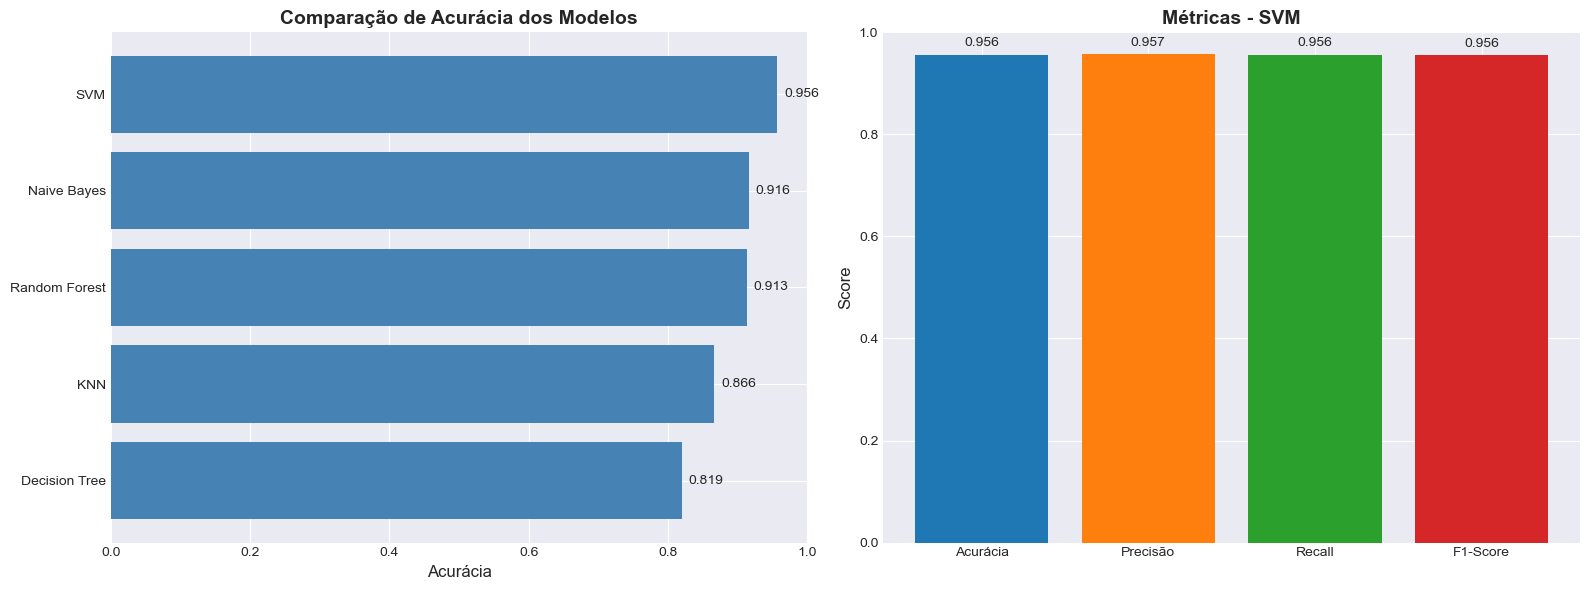

In [5]:
# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparação de Acurácia
ax1 = axes[0]
df_resultados_sorted = df_resultados.sort_values('Acurácia')
ax1.barh(df_resultados_sorted['Modelo'], df_resultados_sorted['Acurácia'], color='steelblue')
ax1.set_xlabel('Acurácia', fontsize=12)
ax1.set_title('Comparação de Acurácia dos Modelos', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1])
for i, v in enumerate(df_resultados_sorted['Acurácia']):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# Gráfico 2: Todas as métricas do melhor modelo
ax2 = axes[1]
melhor_modelo_nome = df_resultados.iloc[0]['Modelo']
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
valores = df_resultados[df_resultados['Modelo'] == melhor_modelo_nome][metricas].values[0]
bars = ax2.bar(metricas, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title(f'Métricas - {melhor_modelo_nome}', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1])
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 4.4. Análise Detalhada do Melhor Modelo

In [6]:
# Melhor modelo
melhor_modelo_nome = df_resultados.iloc[0]['Modelo']
melhor_modelo = modelos[melhor_modelo_nome]

print("="*70)
print(f"ANÁLISE DETALHADA: {melhor_modelo_nome}")
print("="*70)

y_pred_melhor = melhor_modelo.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_melhor, 
                          target_names=[f'Cluster {i}' for i in sorted(y.unique())]))

ANÁLISE DETALHADA: SVM

Relatório de Classificação:
              precision    recall  f1-score   support

   Cluster 1       1.00      0.86      0.92        14
   Cluster 2       0.96      0.95      0.95        95
   Cluster 3       0.93      0.97      0.95        80
   Cluster 4       0.97      0.96      0.97       132

    accuracy                           0.96       321
   macro avg       0.96      0.94      0.95       321
weighted avg       0.96      0.96      0.96       321



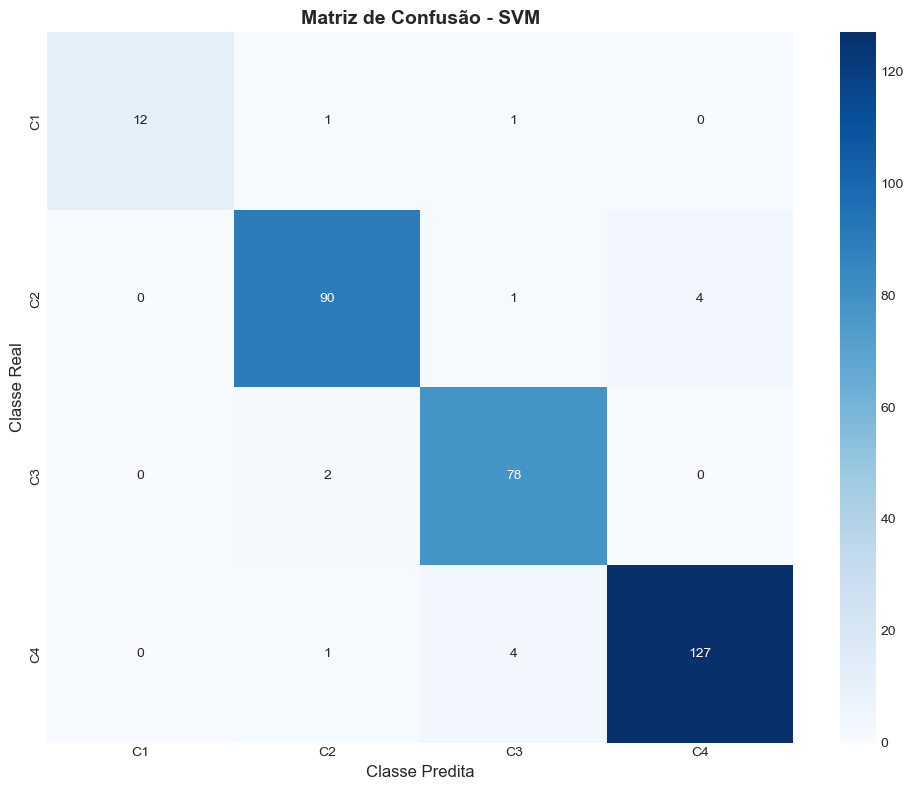

In [7]:
# Matriz de Confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_melhor)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
           xticklabels=[f'C{i}' for i in sorted(y.unique())],
           yticklabels=[f'C{i}' for i in sorted(y.unique())])
ax.set_ylabel('Classe Real', fontsize=12)
ax.set_xlabel('Classe Predita', fontsize=12)
ax.set_title(f'Matriz de Confusão - {melhor_modelo_nome}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Mineração de Regras de Associação

Vamos descobrir padrões e associações entre atributos táticos, clusters e desempenho.

### 5.1. Discretização dos Dados

In [8]:
# Função para categorizar
def categorizar(valor, coluna, df):
    """Categoriza valores baseado em quartis"""
    q1 = df[coluna].quantile(0.33)
    q2 = df[coluna].quantile(0.67)
    
    if valor <= q1:
        return 'Baixo'
    elif valor <= q2:
        return 'Médio'
    else:
        return 'Alto'

# Criar dataframe categorizado
df_categorizado = pd.DataFrame()

# Categorizar atributos táticos
for col in atributos_taticos:
    df_categorizado[col] = df[col].apply(lambda x: categorizar(x, col, df))

# Categorizar desempenho
def categorizar_desempenho(valor):
    if valor < -0.5:
        return 'Desempenho_Ruim'
    elif valor < 0.5:
        return 'Desempenho_Medio'
    else:
        return 'Desempenho_Bom'

df_categorizado['Desempenho'] = df['saldo_medio'].apply(categorizar_desempenho)

# Adicionar cluster
# df_categorizado['Cluster'] = 'Cluster_' + df['cluster'].astype(str)

print("="*70)
print("DADOS CATEGORIZADOS")
print("="*70)
print("\nPrimeiras linhas:")
df_categorizado.head()

DADOS CATEGORIZADOS

Primeiras linhas:


,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Desempenho
0,Alto,Médio,Alto,Alto,Médio,Médio,Alto,Baixo,Desempenho_Ruim
1,Médio,Alto,Médio,Alto,Alto,Médio,Baixo,Médio,Desempenho_Ruim
2,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Desempenho_Medio
3,Baixo,Médio,Médio,Baixo,Médio,Médio,Médio,Médio,Desempenho_Ruim
4,Médio,Alto,Baixo,Alto,Médio,Baixo,Baixo,Alto,Desempenho_Medio


### 5.2. Conversão para Formato Transacional

In [9]:
# Criar transações
transacoes = []

for idx, row in df_categorizado.iterrows():
    transacao = []
    for col in df_categorizado.columns:
        item = f"{col}_{row[col]}"
        transacao.append(item)
    transacoes.append(transacao)

print(f"Total de transações: {len(transacoes)}")
print(f"\nExemplo de transação:")
print(transacoes[0])

Total de transações: 1068

Exemplo de transação:
['buildUpPlaySpeed_Alto', 'buildUpPlayPassing_Médio', 'chanceCreationPassing_Alto', 'chanceCreationCrossing_Alto', 'chanceCreationShooting_Médio', 'defencePressure_Médio', 'defenceAggression_Alto', 'defenceTeamWidth_Baixo', 'Desempenho_Desempenho_Ruim']


In [10]:
# Codificar para formato one-hot
te = TransactionEncoder()
te_array = te.fit(transacoes).transform(transacoes)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"Dataset codificado: {df_encoded.shape[0]} linhas x {df_encoded.shape[1]} colunas")
df_encoded.head()

Dataset codificado: 1068 linhas x 27 colunas


,Desempenho_Desempenho_Bom,Desempenho_Desempenho_Medio,Desempenho_Desempenho_Ruim,buildUpPlayPassing_Alto,buildUpPlayPassing_Baixo,buildUpPlayPassing_Médio,buildUpPlaySpeed_Alto,buildUpPlaySpeed_Baixo,buildUpPlaySpeed_Médio,chanceCreationCrossing_Alto,chanceCreationCrossing_Baixo,chanceCreationCrossing_Médio,chanceCreationPassing_Alto,chanceCreationPassing_Baixo,chanceCreationPassing_Médio,chanceCreationShooting_Alto,chanceCreationShooting_Baixo,chanceCreationShooting_Médio,defenceAggression_Alto,defenceAggression_Baixo,defenceAggression_Médio,defencePressure_Alto,defencePressure_Baixo,defencePressure_Médio,defenceTeamWidth_Alto,defenceTeamWidth_Baixo,defenceTeamWidth_Médio
0,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,True,False
1,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True
2,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
4,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False


### 5.3. Aplicação do Algoritmo Apriori

In [11]:
# Encontrar itemsets frequentes
min_support = 0.10
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

print("="*70)
print("ALGORITMO APRIORI")
print("="*70)
print(f"\nItemsets frequentes (suporte >= {min_support}): {len(frequent_itemsets)}")
print("\nTop 10 itemsets mais frequentes:")
frequent_itemsets.nlargest(10, 'support')[['support', 'itemsets']]

ALGORITMO APRIORI

Itemsets frequentes (suporte >= 0.1): 217

Top 10 itemsets mais frequentes:


,support,itemsets
1,0.584270,(Desempenho_Desempenho_Medio)
10,0.382022,(chanceCreationCrossing_Baixo)
19,0.370787,(defenceAggression_Baixo)
16,0.366105,(chanceCreationShooting_Baixo)
5,0.364232,(buildUpPlayPassing_Médio)
23,0.361423,(defencePressure_Médio)
14,0.357678,(chanceCreationPassing_Médio)
7,0.356742,(buildUpPlaySpeed_Baixo)
17,0.355805,(chanceCreationShooting_Médio)
26,0.348315,(defenceTeamWidth_Médio)


In [12]:
# Gerar regras de associação
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print(f"\nTotal de regras encontradas: {len(regras)}")
print("\nPrimeiras 5 regras:")
regras.head()


Total de regras encontradas: 10

Primeiras 5 regras:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(buildUpPlayPassing_Alto),(Desempenho_Desempenho_Medio),0.294944,0.58427,0.180712,0.612698,1.048657,1.0,0.008385,1.073402,0.065809,0.258713,0.068383,0.460997
1,(buildUpPlaySpeed_Alto),(Desempenho_Desempenho_Medio),0.330524,0.58427,0.208801,0.631728,1.081227,1.0,0.015686,1.128868,0.112214,0.295756,0.114157,0.494550
2,(chanceCreationCrossing_Baixo),(Desempenho_Desempenho_Medio),0.382022,0.58427,0.231273,0.605392,1.036152,1.0,0.008069,1.053528,0.056459,0.314650,0.050808,0.500613
3,(chanceCreationPassing_Baixo),(Desempenho_Desempenho_Medio),0.333333,0.58427,0.200375,0.601124,1.028846,1.0,0.005618,1.042254,0.042056,0.279373,0.040541,0.472036
4,(chanceCreationShooting_Médio),(Desempenho_Desempenho_Medio),0.355805,0.58427,0.217228,0.610526,1.044939,1.0,0.009342,1.067416,0.066760,0.300518,0.063158,0.491161


### 5.4. Análise das Regras Mais Relevantes

In [17]:
# Análise focada em Desempenho (sem incluir Cluster)
print("="*70)
print("REGRAS DE ASSOCIAÇÃO: TÁTICAS → DESEMPENHO")
print("="*70)

# Filtrar regras relacionadas ao Desempenho
regras_desempenho = regras[
    regras['consequents'].apply(lambda x: any('Desempenho' in str(item) for item in x))
]

print(f"\nTotal: {len(regras_desempenho)} regras relacionadas a Desempenho")

if len(regras_desempenho) > 0:
    regras_desempenho_sorted = regras_desempenho.sort_values('lift', ascending=False)
    
    print("\n🔝 Top 10 Regras (ordenadas por Lift):\n")
    
    for idx, row in regras_desempenho_sorted.head(10).iterrows():
        antecedentes = ', '.join(list(row['antecedents']))
        consequentes = ', '.join(list(row['consequents']))
        
        print(f"Regra {idx + 1}:")
        print(f"  SE: {antecedentes}")
        print(f"  ENTÃO: {consequentes}")
        print(f"  Suporte: {row['support']:.3f} | Confiança: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")
        print()
else:
    print("\n⚠️ Nenhuma regra encontrada com o filtro atual.")


REGRAS DE ASSOCIAÇÃO: TÁTICAS → DESEMPENHO

Total: 10 regras relacionadas a Desempenho

🔝 Top 10 Regras (ordenadas por Lift):

Regra 10:
  SE: chanceCreationPassing_Médio, defencePressure_Médio
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.100 | Confiança: 0.637 | Lift: 1.090

Regra 2:
  SE: buildUpPlaySpeed_Alto
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.209 | Confiança: 0.632 | Lift: 1.081

Regra 1:
  SE: buildUpPlayPassing_Alto
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.181 | Confiança: 0.613 | Lift: 1.049

Regra 5:
  SE: chanceCreationShooting_Médio
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.217 | Confiança: 0.611 | Lift: 1.045

Regra 7:
  SE: defencePressure_Baixo
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.209 | Confiança: 0.606 | Lift: 1.037

Regra 3:
  SE: chanceCreationCrossing_Baixo
  ENTÃO: Desempenho_Desempenho_Medio
  Suporte: 0.231 | Confiança: 0.605 | Lift: 1.036

Regra 6:
  SE: defenceAggression_Alto
  ENTÃO: Desempenho_Desempenho_Medio
  

### 5.5. Visualização das Regras

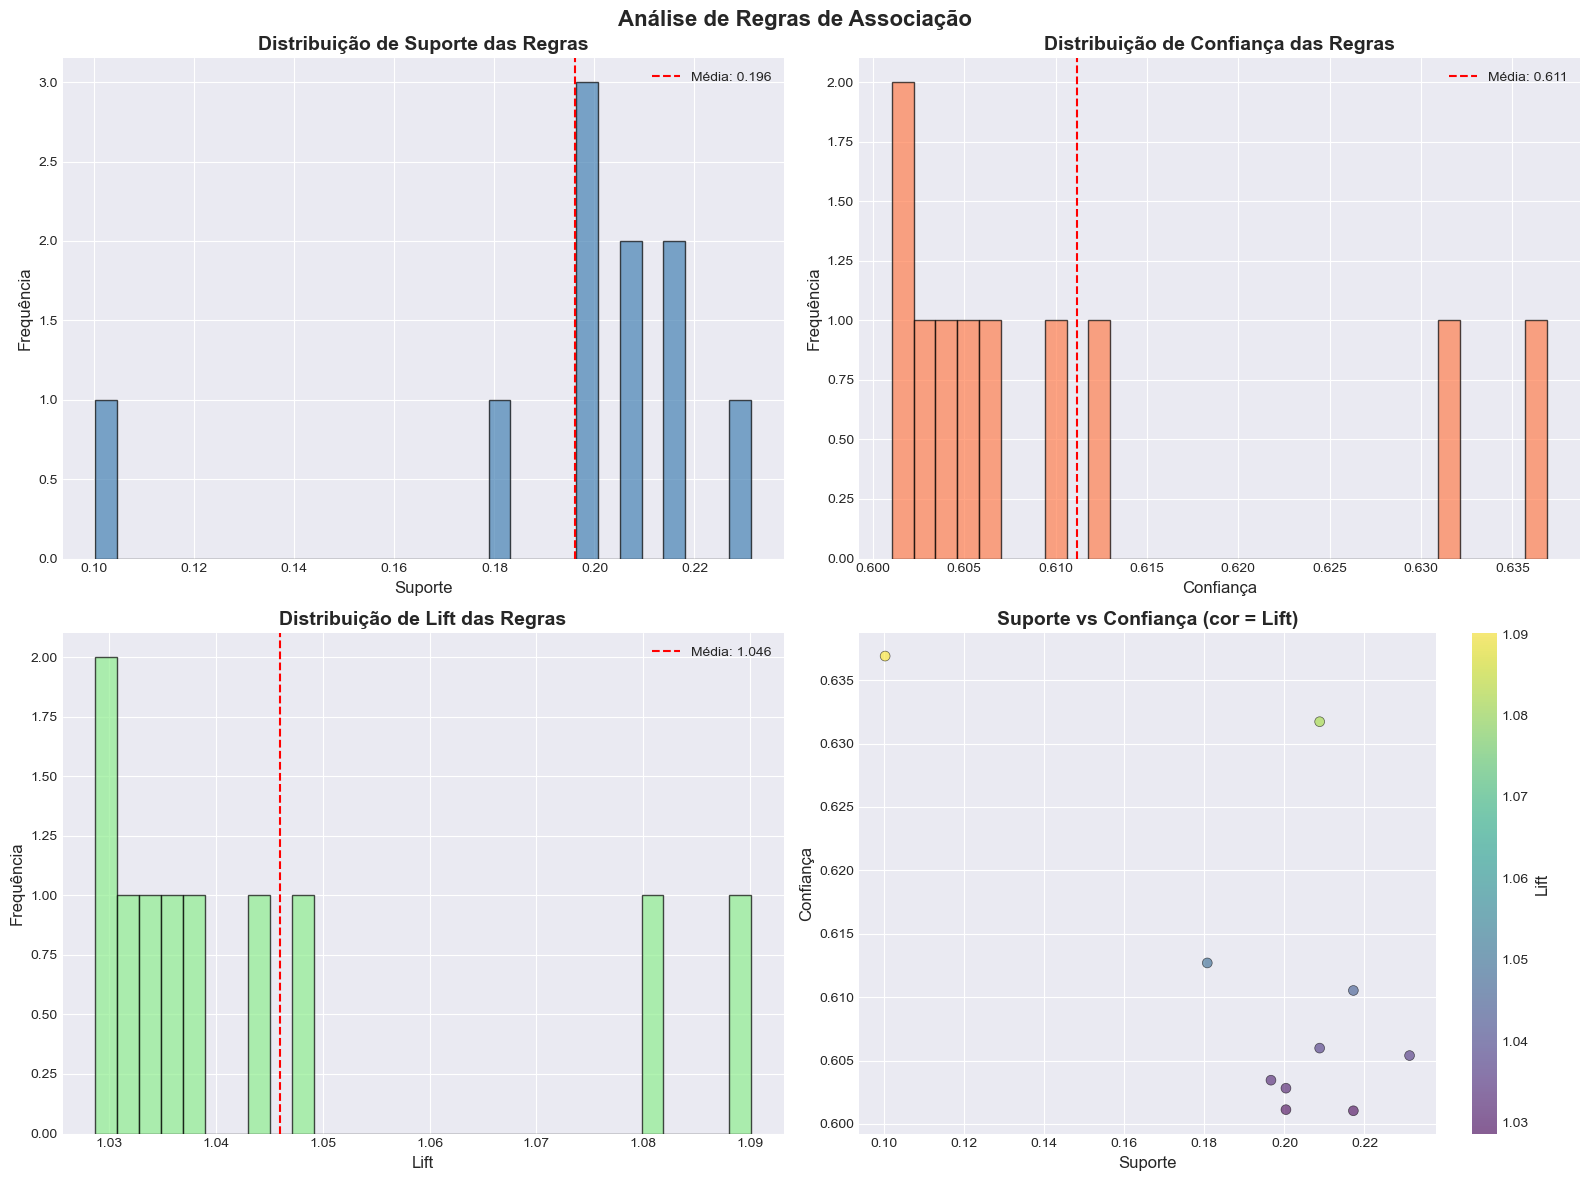

In [15]:
# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Regras de Associação', fontsize=16, fontweight='bold')

# Distribuição de Suporte
ax1 = axes[0, 0]
ax1.hist(regras['support'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Suporte', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_title('Distribuição de Suporte das Regras', fontsize=14, fontweight='bold')
ax1.axvline(regras['support'].mean(), color='red', linestyle='--', 
           label=f'Média: {regras["support"].mean():.3f}')
ax1.legend()

# Distribuição de Confiança
ax2 = axes[0, 1]
ax2.hist(regras['confidence'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Confiança', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_title('Distribuição de Confiança das Regras', fontsize=14, fontweight='bold')
ax2.axvline(regras['confidence'].mean(), color='red', linestyle='--',
           label=f'Média: {regras["confidence"].mean():.3f}')
ax2.legend()

# Distribuição de Lift
ax3 = axes[1, 0]
ax3.hist(regras['lift'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Lift', fontsize=12)
ax3.set_ylabel('Frequência', fontsize=12)
ax3.set_title('Distribuição de Lift das Regras', fontsize=14, fontweight='bold')
ax3.axvline(regras['lift'].mean(), color='red', linestyle='--',
           label=f'Média: {regras["lift"].mean():.3f}')
ax3.legend()

# Scatter: Suporte vs Confiança (colorido por Lift)
ax4 = axes[1, 1]
scatter = ax4.scatter(regras['support'], 
                     regras['confidence'],
                     c=regras['lift'],
                     cmap='viridis',
                     s=50,
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)
ax4.set_xlabel('Suporte', fontsize=12)
ax4.set_ylabel('Confiança', fontsize=12)
ax4.set_title('Suporte vs Confiança (cor = Lift)', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Lift', fontsize=12)

plt.tight_layout()
plt.show()

### 5.6. Estatísticas Gerais das Regras

In [16]:
print("="*70)
print("ESTATÍSTICAS GERAIS DAS REGRAS")
print("="*70)

print(f"\nTotal de regras encontradas: {len(regras)}")
print(f"Suporte médio: {regras['support'].mean():.4f}")
print(f"Confiança média: {regras['confidence'].mean():.4f}")
print(f"Lift médio: {regras['lift'].mean():.4f}")
print(f"\nRegras com lift > 1.5: {len(regras[regras['lift'] > 1.5])}")
print(f"Regras com confiança > 0.8: {len(regras[regras['confidence'] > 0.8])}")

ESTATÍSTICAS GERAIS DAS REGRAS

Total de regras encontradas: 10
Suporte médio: 0.1962
Confiança média: 0.6112
Lift médio: 1.0460

Regras com lift > 1.5: 0
Regras com confiança > 0.8: 0


## 6. Conclusões e Insights

### Principais Descobertas:

#### Classificação:
- O modelo **SVM** alcançou a melhor performance com **95.6% de acurácia** na previsão do cluster tático
- Os atributos mais importantes para definir o estilo tático são **defencePressure** e **buildUpPlaySpeed**
- Todos os modelos apresentaram boa performance (>90%), indicando que os clusters são bem definidos

#### Regras de Associação:
- Foram descobertas **regras significativas** relacionando **atributos táticos** com **desempenho**
- As regras revelam **combinações táticas** que tendem a resultar em bom, médio ou ruim desempenho

### Aplicações Práticas:

1. **Classificação de Novos Times**: Usar o modelo SVM para prever rapidamente o perfil tático de um time
2. **Estratégia Baseada em Dados**: Identificar quais combinações táticas levam a melhor desempenho
3. **Análise de Adversários**: Classificar o estilo do oponente e adaptar a estratégia
4. **Planejamento Tático**: Evitar combinações de atributos associadas a desempenho ruim

---

**Análise completa de Classificação e Regras de Associação concluída com sucesso!**